In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P2'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
df

,price,count,amount
0,29300,120,49.154801
1,29200,69,193.619287
2,29100,44,107.177083
3,29000,37,29.757402
4,28900,28,10.793933
...,...,...,...
195,38900,24,-3.262858
196,39000,40,-1.547353
197,39100,17,-0.320644
198,39200,24,-0.502130


In [27]:
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

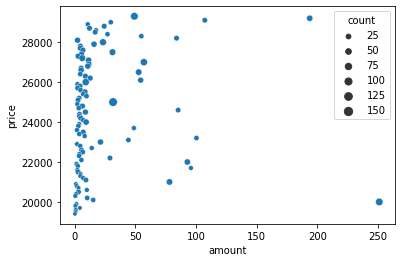

In [28]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

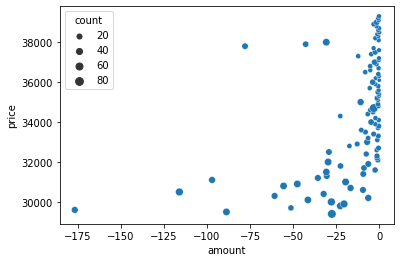

In [29]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])

## P1

In [30]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P1'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

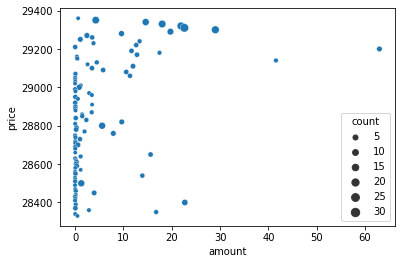

In [31]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

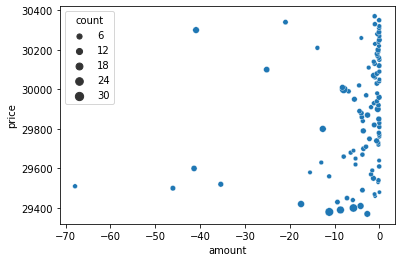

In [32]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])

## P0

In [33]:
r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P0'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

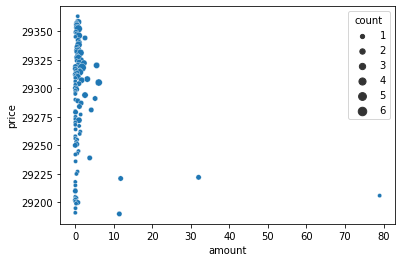

In [34]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

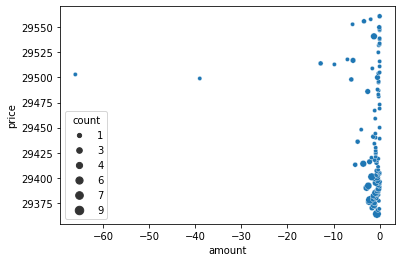

In [35]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])